In [5]:
import networkx as nx
from icecream import ic

## Create graph (bisht2022, fig. 7)

In [6]:
G = nx.Graph()

In [7]:
edges = [(1,2), (1,3), (1,4), 
        (2,3), (2,4),
        (3,4), (3,5),
        (5,6),
        (6,7), (6,8),
        (7,8)]
G.add_edges_from(edges)

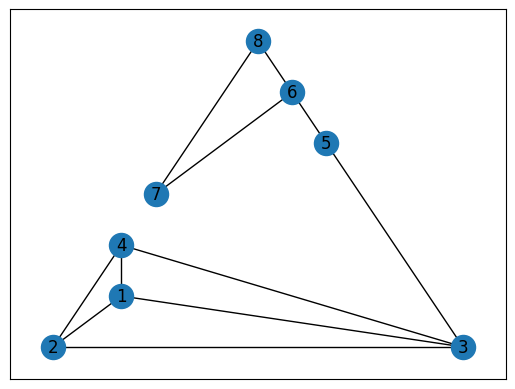

In [8]:
labels = {node: node for node in G.nodes}

pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G,pos )
nx.draw_networkx_labels(G, pos, labels=labels);

## Find articulation points 

In [9]:
cut_vertices = list(nx.articulation_points(G))
cut_vertices

[6, 5, 3]

## Algo 1

In [10]:
def find_difference(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    
    # Find the elements present in set1 but not in set2
    difference1 = set1 - set2
    
    # Find the elements present in set2 but not in set1
    difference2 = set2 - set1
    
    return difference1, difference2

In [11]:
blocks = list(nx.biconnected_components(G))
blocks

[{6, 7, 8}, {5, 6}, {3, 5}, {1, 2, 3, 4}]

In [12]:
def check_block(node, blocks):
    # see what blocks a node belongs to
    indices = []
    set_members = []
    for index, my_set in enumerate(blocks):
        if node in my_set:
            indices.append(index)
            set_members.append(my_set)
            # print(f"The integer {node} belongs to the set at index {index}")
            # break
    # else:
    #     pass
    #     print(f"The integer {node} is not present in any set.")
    # ic(indices)
    # set_members = set().union(*set_members)
    return indices, set_members

In [13]:
k = [{5, 6}, {3, 5}]
set().union(*k)

{3, 5, 6}

In [14]:
check_block(5, blocks)

([1, 2], [{5, 6}, {3, 5}])

In [15]:
def biconnect(G, cut_vertices):
    for v in cut_vertices:
        # find vertices adjacent to x (ie neighbours of x?)
        neighbors = list(G.neighbors(v))
        blocks = list(nx.biconnected_components(G))
        ic("\n", v, neighbors)
        for curr_item, next_item in zip(neighbors, neighbors[1:]):
            curr_block, curr_block_members = check_block(curr_item, blocks)
            next_block, next_block_members = check_block(next_item, blocks)
            ic(curr_item, curr_block_members)
            ic(next_item, next_block_members)
            if not set(curr_block) & set(next_block):
                edge = (curr_item, next_item)
                ic(f"No overlap between {edge}. Adding edge")
                # add edges between vertices 
                G.add_edge(curr_item, next_item)

    return G





In [16]:
blocks

[{6, 7, 8}, {5, 6}, {3, 5}, {1, 2, 3, 4}]

In [17]:
G_biconnect = biconnect(G.copy(), cut_vertices)
G_biconnect

ic| "\n": '
           '
    v: 6
    neighbors: [5, 7, 8]
ic| curr_item: 5, curr_block_members: [{5, 6}, {3, 5}]
ic| next_item: 7, next_block_members: [{8, 6, 7}]
ic| f"No overlap between {edge}. Adding edge": 'No overlap between (5, 7). Adding edge'
ic| curr_item: 7, curr_block_members: [{8, 6, 7}]
ic| next_item: 8, next_block_members: [{8, 6, 7}]
ic| "\n": '
           '
    v: 5
    neighbors: [3, 6, 7]
ic| curr_item: 3, curr_block_members: [{3, 5}, {1, 2, 3, 4}]
ic| next_item: 6, next_block_members: [{8, 5, 6, 7}]
ic| f"No overlap between {edge}. Adding edge": 

'No overlap between (3, 6). Adding edge'
ic| curr_item: 6, curr_block_members: [{8, 5, 6, 7}]
ic| next_item: 7, next_block_members: [{8, 5, 6, 7}]
ic| "\n": '
           '
    v: 3
    neighbors: [1, 2, 4, 5, 6]
ic| curr_item: 1, curr_block_members: [{1, 2, 3, 4}]
ic| next_item: 2, next_block_members: [{1, 2, 3, 4}]
ic| curr_item: 2, curr_block_members: [{1, 2, 3, 4}]
ic| next_item: 4, next_block_members: [{1, 2, 3, 4}]
ic| curr_item: 4, curr_block_members: [{1, 2, 3, 4}]
ic| next_item: 5, next_block_members: [{3, 5, 6, 7, 8}]
ic| f"No overlap between {edge}. Adding edge": 'No overlap between (4, 5). Adding edge'
ic| curr_item: 5, curr_block_members: [{3, 5, 6, 7, 8}]
ic| next_item: 6, next_block_members: [{3, 5, 6, 7, 8}]


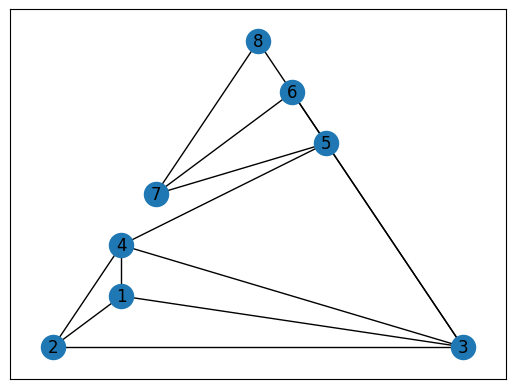

In [18]:
# pos = nx.planar_layout(G_biconnect)
nx.draw_networkx_nodes(G_biconnect, pos)
nx.draw_networkx_edges(G_biconnect,pos )
nx.draw_networkx_labels(G_biconnect, pos, labels=labels);

In [19]:
find_difference(G.edges, G_biconnect.edges)

(set(), {(3, 6), (4, 5), (5, 7)})

### planarity check 

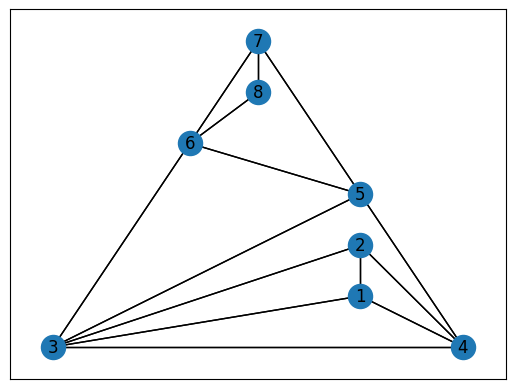

In [20]:
mbool, GP = nx.check_planarity(G_biconnect)
mbool

pos_planar = nx.planar_layout(GP)
nx.draw_networkx_nodes(GP, pos_planar)
nx.draw_networkx_edges(GP,pos_planar )
nx.draw_networkx_labels(GP, pos_planar, labels=labels);

## triangulation attempt

In [21]:
simple_cycles = sorted(nx.simple_cycles(G_biconnect, 4))
simple_cycles

[[1, 2, 3],
 [1, 2, 3, 4],
 [1, 2, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4],
 [1, 3, 5, 4],
 [2, 3, 4],
 [2, 3, 5, 4],
 [3, 4, 5],
 [3, 4, 5, 6],
 [3, 5, 6],
 [3, 5, 7, 6],
 [5, 6, 7],
 [5, 6, 8, 7],
 [8, 6, 7]]

In [22]:
l4_cycles = [arr for arr in simple_cycles if len(arr) == 4]
l4_cycles

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 5, 4],
 [2, 3, 5, 4],
 [3, 4, 5, 6],
 [3, 5, 7, 6],
 [5, 6, 8, 7]]

In [23]:
sorted(nx.chordless_cycles(G_biconnect, 4))

[[2, 1, 3],
 [2, 1, 4],
 [3, 1, 4],
 [3, 2, 4],
 [4, 3, 5],
 [5, 3, 6],
 [6, 5, 7],
 [6, 8, 7]]

In [24]:
nx.is_chordal(G_biconnect.copy())

True

In [25]:
G_tri, alpha = nx.complete_to_chordal_graph(G_biconnect.copy())
# G2 = nx.delaunay_triangulation(nodes)



In [26]:
find_difference(G_tri.edges, G_biconnect.edges)

(set(), set())

## remove seperating triangles 

In [27]:
# check 
l3_cycles = sorted(nx.simple_cycles(G_biconnect, 3))
m = len(list(G_biconnect.edges))
n = len(list(G_biconnect.nodes))
ic(len(l3_cycles), m, n, m-n+1);
# #3 cycles ==? edges - # vertices + 1

ic| len(l3_cycles): 8, m: 14, n: 8, m-n+1: 7
